# P11. Investigating Fandango Movie Ratings

Fandango is a movie rating website, it uses a 5-star rating system. A study in 2015 found that Fandango was inflating movie ratings, and their distributions of displayed ratings was clearly shifted to the right compared to the actual rating distribution. 

In this project, we will analyze more recent movie ratings data to determine if Fandango has change its practices and corrected its rating system. 

## Loading available datasets into project

In [10]:
import pandas as pd

fandango = pd.read_csv('fandango_score_comparison.csv')
f_cols = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
fandango = fandango[f_cols]
fandango.head()
#fandango.shape


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [9]:
movies = pd.read_csv('movie_ratings_16_17.csv')
m_cols = ['movie', 'year', 'fandango']
movies = movies[m_cols]
movies.shape
movies.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [4]:
movies_fandango = pd.merge(movies, fandango, how='inner',left_on = 'movie', right_on = 'FILM')
movies_fandango.head()

,movie,year,fandango,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference


**Observations:** Because the sampling processes for these datasets were not random, the resulting samples are very unlikely to be representative of the population we are trying to analyze. Hence, we will be changing slightly the goal of this project. Our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

A movie is considered popular, if:
- It has 30 fan ratings or more on Fandango's website

In [42]:
fandango['Year'] = fandango['FILM'].str[-5:-1]
fandango['Year'].head()

fandango_2015 = fandango[fandango['Year']=='2015']


In [46]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [48]:
fandango['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [52]:
movies_2016 = movies[movies['year']==2016]
movies_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Analyzing Ratings of Popular Movies

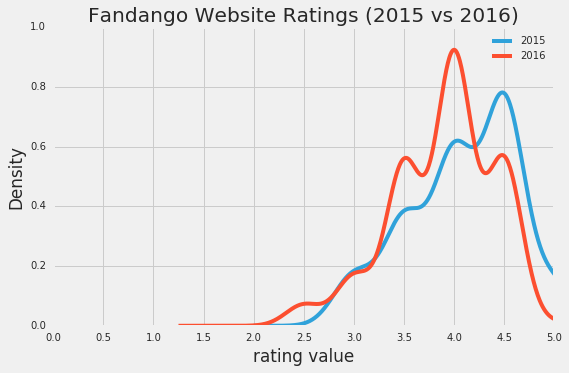

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange

plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label = 2015, figsize = (8,5))
movies_2016['fandango'].plot.kde(label = 2016)
plt.title('Fandango Website Ratings (2015 vs 2016)')
plt.legend()
plt.xlabel('rating value')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

It appears that there is a slight shift of Fandango ratings for popular movies, as 2016 ratings are shifted to the left when comparing to 2015. 

## Comparing Relative Frequencies

Because 2015 vs 2016 samples include different movies, it doesn't make sense to compare two tables using absolute frequencies. We will create relative frequencies of proportions.



In [149]:
fandango_2015['Fandango_Stars'].value_counts(bins=4,normalize=True).iloc[[3,1,0,2]]


(4.5, 5.0]                   0.069767
(3.5, 4.0]                   0.286822
(4.0, 4.5]                   0.379845
(2.9970000000000003, 3.5]    0.263566
Name: Fandango_Stars, dtype: float64

In [105]:
movies_2016['fandango'].value_counts(bins=4, normalize=True).iloc[[3,2,0,1]]

(2.4970000000000003, 3.125]    0.104712
(3.125, 3.75]                  0.240838
(3.75, 4.375]                  0.403141
(4.375, 5.0]                   0.251309
Name: fandango, dtype: float64

## Determining the Direction of the Change

In [151]:
print('Mean: ' + str(fandango_2015['Fandango_Stars'].mean()))
print('Median: ' + str(fandango_2015['Fandango_Stars'].median()))
print('Mode: ' + str(fandango_2015['Fandango_Stars'].mode()[0]))
mean_15 = fandango_2015['Fandango_Stars'].mean()
median_15 = fandango_2015['Fandango_Stars'].median()
mode_15 = fandango_2015['Fandango_Stars'].mode()[0]

Mean: 4.0852713178294575
Median: 4.0
Mode: 4.5


In [154]:
print('Mean: ' + str(movies_2016['fandango'].mean()))
print('Median: ' + str(movies_2016['fandango'].median()))
print('Mode: ' + str(movies_2016['fandango'].mode()[0]))

mean_16 = movies_2016['fandango'].mean()
median_16 = movies_2016['fandango'].median()
mode_16 = movies_2016['fandango'].mode()[0]

Mean: 3.887434554973822
Median: 4.0
Mode: 4.0


In [155]:
summary = pd.DataFrame()

summary['2015'] = [mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['mean', 'median', 'mode']
summary.head()

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


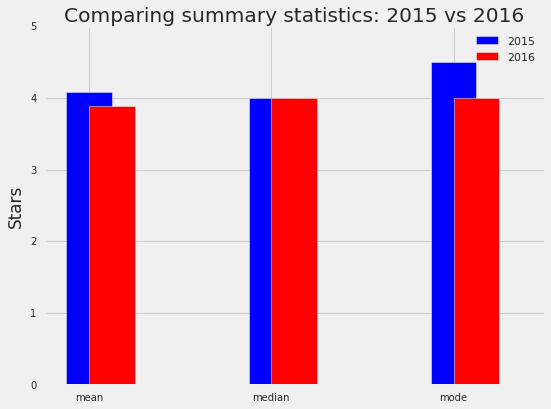

In [183]:
summary['2015'].plot.bar(align='center', color='blue', label=2015, width = .25, figsize = (8,6))
summary['2016'].plot.bar(align='edge', color= 'red', label=2016, rot=0, width = .25)
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.legend(prop={'size': 11})
plt.ylabel('Stars')
plt.ylim(0,5)
plt.show()


In [140]:
summary.columns

Index(['2015', '2016'], dtype='object')